In [1]:
import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)

Welcome to JupyROOT 6.12/06


In [2]:
#outfile = r.TFile("./FourierWiggle.root","RECREATE")
f = r.TFile("./gm2offline_ana_7893458_15937.00027.root")
f.cd("clusterTree")
f.ls()
t = f.Get("clusterTree").Get("clusters")

TFile**		./gm2offline_ana_7893458_15937.00027.root	
 TFile*		./gm2offline_ana_7893458_15937.00027.root	
  TDirectoryFile*		clusterTree	clusterTree (ClusterTree) folder
   KEY: TTree	clusters;94	clusters
   KEY: TTree	clusters;93	clusters
  KEY: TDirectoryFile	CoincidenceFinderLM;1	CoincidenceFinderLM (CoincidenceFinderLM) folder
  KEY: TDirectoryFile	clusterTree;1	clusterTree (ClusterTree) folder


In [3]:
#incrementtime = 5*1000/1.25
incrementtime = .55*1000/1.25/2
cutlist = []
timelist = []
namelist = []
time1list = []
time2list = []
for i in range(0,48):
#    time1 = 5*1000/1.25
#    time2 = 405*1000/1.25
    time1 = 20*1000/1.25
    time2 = (392.85+20)*1000/1.25
    time1 = time1+i*incrementtime
    time2 = time2+i*incrementtime
    time1list.append(time1/1000*1.25)
    time2list.append(time2/1000*1.25)
    ding = "caloNum == 7 && energy > 1300 && energy < 3000 && time>" + str(time1) + " && time < " +str(time2)
#    if i == 0 or i == 1 or i == 2 or i ==3  or i == 5 or i == 9:
    cutlist.append(ding)
    timelist.append("time > "+str(time1/1000*1.25)+" && time < "+str(time2/1000*1.25))
    namelist.append("time"+str(i))
ncuts = len(cutlist)

[<ROOT.TH1D object ("h") at 0x7fffe920f8a0>]


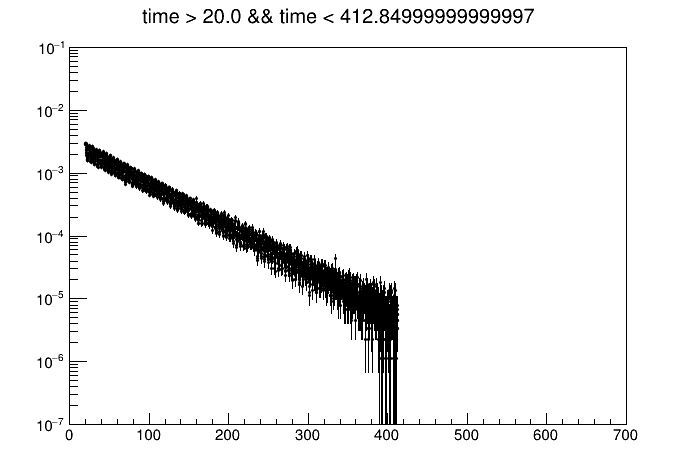

In [4]:
hlist = []
for i in range(0,1):#ncuts):
    c = r.TCanvas()
    c.SetLogy()
    dong = timelist[i]
    h = r.TH1D("h",dong,4690,0,700)
#    maxbin = int(time2list[i])
#    nbins = 4690*maxbin/700
#    print(nbins,maxbin)
#    h = r.TH1D("h",dong,int(nbins),r.Double(0),r.Double(maxbin))
    h.SetMarkerColor(1)
    h.SetMarkerStyle(8)
    h.SetLineColor(1)
    h.SetMarkerSize(.25)
    t.Draw("time*1.25/1000>>h",cutlist[i],"goff")
    norm = h.GetEntries()
    h.Scale(1/norm)
    h.GetYaxis().SetRangeUser(.0000001,.1)
    h.Draw("E0 P0")
    hlist.append(h.DrawClone(namelist[i]))
    #h.SetTitle("")
    #outfile.cd()
    #h.Write("wiggleNoFit")
    c.Draw()
print(hlist)

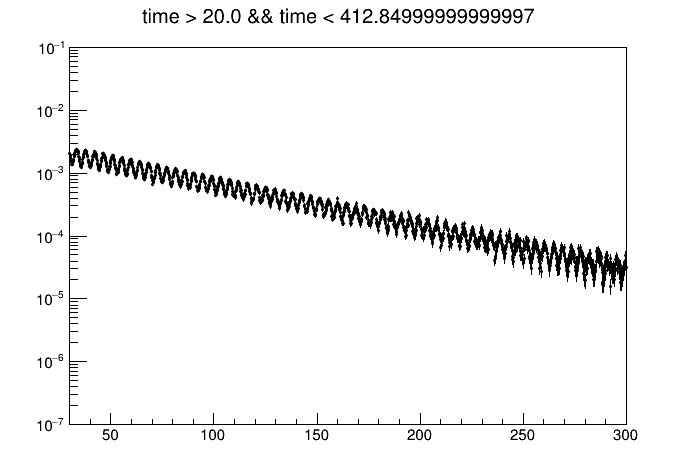

In [9]:
h2 = hlist[0].DrawClone()
c2 = r.TCanvas()
c2.SetLogy()
h2.GetXaxis().SetRangeUser(30,300)
h2.Draw()
c2.Draw()

 FCN=32162.5 FROM MINOS     STATUS=SUCCESSFUL     12 CALLS         235 TOTAL
                     EDM=1.02807e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant    -5.80275e+00   2.26998e-03  -2.12387e-06  -7.68130e-03
   2  Slope       -1.55299e-02   2.14309e-05   2.14309e-05  -1.88635e+00


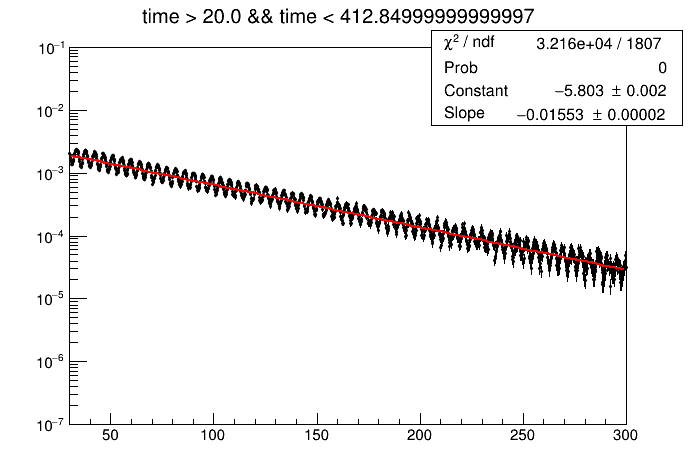

In [10]:
expoonly = r.TF1("expoonly","expo",30,350)
h2.Fit("expoonly","REMB")
h2.Draw()
expoonly.Draw("SAME")
c2.Draw()

Unknown function: func


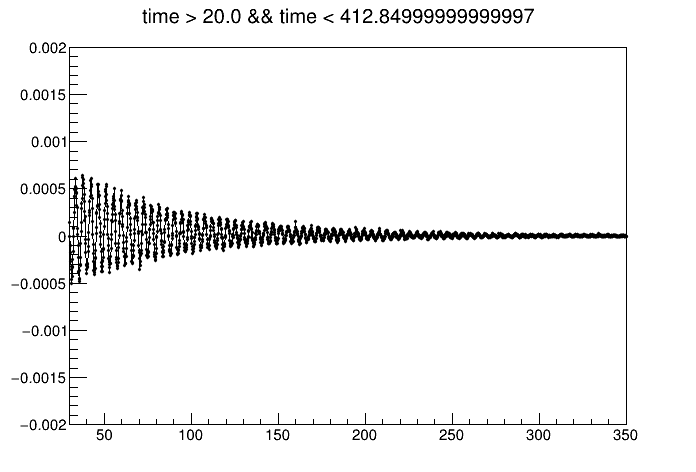

In [13]:
h5 = hlist[0].DrawClone()
c5 = r.TCanvas()
#c5.SetLogy()

for i in range(0,h2.GetNbinsX()-2):
    bincenter = h2.GetBinCenter(i)
    bincontent = h2.GetBinContent(i)
    dong = bincontent - expoonly.Eval(bincenter)
    h5.SetBinContent(i,dong)

h5.GetXaxis().SetRangeUser(30,350)
h5.GetYaxis().SetRangeUser(-0.002,0.002)
    
h5.Draw("HIST P0 L")
h5.Fit("func","REMB")
#func.Draw("SAME")
c5.Draw()

In [15]:
hlist2 = []
hlist2.append(h5)
print(hlist2)

[<ROOT.TH1D object ("h") at 0x7fffe974c430>]


4690 700.0 -0.07462686567164178 699.9253731343283
0.14925373134328357 0.0014285714285714286
13.4 6.7


Warning in <TDirectoryFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).


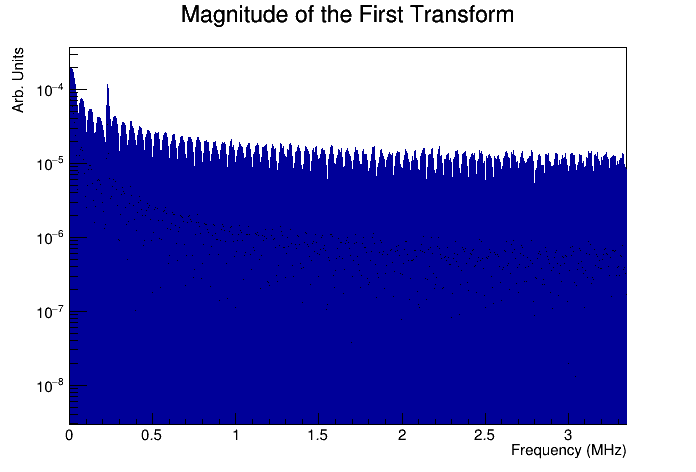

In [19]:
hxformlist = []
for i in range(0,1):#len(namelist)):
    hxform = r.TH1D()
    hxform = 0
    r.TVirtualFFT.SetTransform(0)
    h = hlist2[i]
    hxform = h.FFT(hxform,"MAG P")
    hxform.SetTitle("Magnitude of the First Transform")
    #NOTE: for "real" frequencies you have to divide the x-axes range with the range of your function
    #    y-axes has to be rescaled by a factor of 1/SQRT(n) to be right: this is not done automatically!
    normXform = hxform.GetEntries()
    hxform.Scale(1/normXform)
    #hxform.GetXaxis().SetRangeUser(0,limmax)
    c2 = r.TCanvas()
    c2.cd()
    c2.SetLogy()
    hxform.GetXaxis().SetTitle("Frequency (MHz)")
    hxform.GetYaxis().SetTitle("Arb. Units")
    hxform.Draw("HIST P0 L")
    c2.Draw()
    
    Npart = h.GetSize() - 2
    minBinCenter = h.GetXaxis().GetBinCenter(0)
    maxBinCenter = h.GetXaxis().GetBinCenter(Npart)
#    minBinCenter = 0
#    maxBinCenter = 392.85
    capT = maxBinCenter - minBinCenter
    print(Npart, capT, minBinCenter, maxBinCenter)
    deltaT = capT/Npart #microseconds
    deltaF = 1/capT
    print(deltaT, deltaF)

    deltaTns = deltaT*1000 #nanoseconds
    limmaxHz = (1/(deltaTns*math.pow(10.0,-9)))
    limmaxMHz = limmaxHz / math.pow(10,6)

    limmax = 2*deltaF*Npart #400-25
    print(limmax,limmaxMHz)
    #hxform.GetXaxis().SetLimits(0,limmax)
    nbins = h.GetSize() - 2
    hxform.SetBins(Npart,0,limmaxMHz)
    hxform.GetXaxis().SetRangeUser(0,limmaxMHz/2)

    hxformlist.append(hxform.DrawClone(namelist[i]+"xform"))

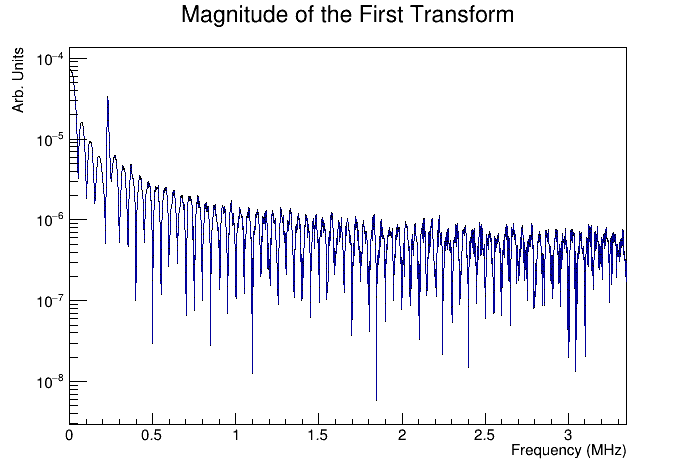

In [21]:
c3 = r.TCanvas()
c3.SetLogy()
hxformlist[0].Draw("HIST P0 L")
c3.Draw()